In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split


In [8]:
df=pd.read_csv('Iris.csv')

In [9]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [11]:
# Droping the column as it is irrelvant as it just index 
df.drop("Id",axis=1,inplace=True)

In [12]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [26]:
y=df.iloc[:,-1]

In [27]:
X=df.iloc[:,:-1]

In [28]:
xtrain,xtest,ytrain,ytest=train_test_split(X,y)

In [29]:
dct=DecisionTreeClassifier()

In [30]:
dct.fit(xtrain,ytrain)

DecisionTreeClassifier()

In [31]:
dct.score(xtrain,ytrain)

1.0

In [32]:
from sklearn.model_selection import GridSearchCV

In [33]:
param=[{'criterion':['gini','entropy']},
      {'max_depth':np.arange(1,4)}]

In [34]:
gsv=GridSearchCV(dct,param_grid=param)

In [35]:
gsv.fit(xtrain,ytrain)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid=[{'criterion': ['gini', 'entropy']},
                         {'max_depth': array([1, 2, 3])}])

In [36]:
gsv.best_estimator_

DecisionTreeClassifier(max_depth=2)

In [37]:
# redefining decision tree
dct=DecisionTreeClassifier(criterion='gini',max_depth=2)

In [38]:
dct.fit(xtrain,ytrain)

DecisionTreeClassifier(max_depth=2)

In [39]:
dct.score(xtrain,ytrain)

0.9732142857142857

In [40]:
dct.score(xtest,ytest)

0.9210526315789473

In [42]:
y_pred=dct.predict(xtest)

In [43]:
y_pred

array(['Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-virginica',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-setosa', 'Iris-versicolor', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor', 'Iris-setosa'],
      dtype=object)

In [44]:
y_prob=dct.predict_proba(xtest)

In [45]:
y_prob

array([[0.        , 0.94736842, 0.05263158],
       [0.        , 0.94736842, 0.05263158],
       [1.        , 0.        , 0.        ],
       [0.        , 0.94736842, 0.05263158],
       [0.        , 0.02564103, 0.97435897],
       [0.        , 0.94736842, 0.05263158],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [0.        , 0.02564103, 0.97435897],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [0.        , 0.94736842, 0.05263158],
       [0.        , 0.02564103, 0.97435897],
       [0.        , 0.02564103, 0.97435897],
       [0.        , 0.02564103, 0.97435897],
       [0.        , 0.94736842, 0.05263158],
       [0.        , 0.02564103, 0.97435897],
       [1.        , 0.        , 0.        ],
       [0.        , 0.94736842, 0.05263158],
       [1.        , 0.        , 0.        ],
       [1.

In [55]:
predict=pd.DataFrame(zip(y_pred,y_prob),columns=['Predict class','Predict Prob'])
predict.head()

,Predict class,Predict Prob
0,Iris-versicolor,"[0.0, 0.9473684210526315, 0.05263157894736842]"
1,Iris-versicolor,"[0.0, 0.9473684210526315, 0.05263157894736842]"
2,Iris-setosa,"[1.0, 0.0, 0.0]"
3,Iris-versicolor,"[0.0, 0.9473684210526315, 0.05263157894736842]"
4,Iris-virginica,"[0.0, 0.02564102564102564, 0.9743589743589743]"


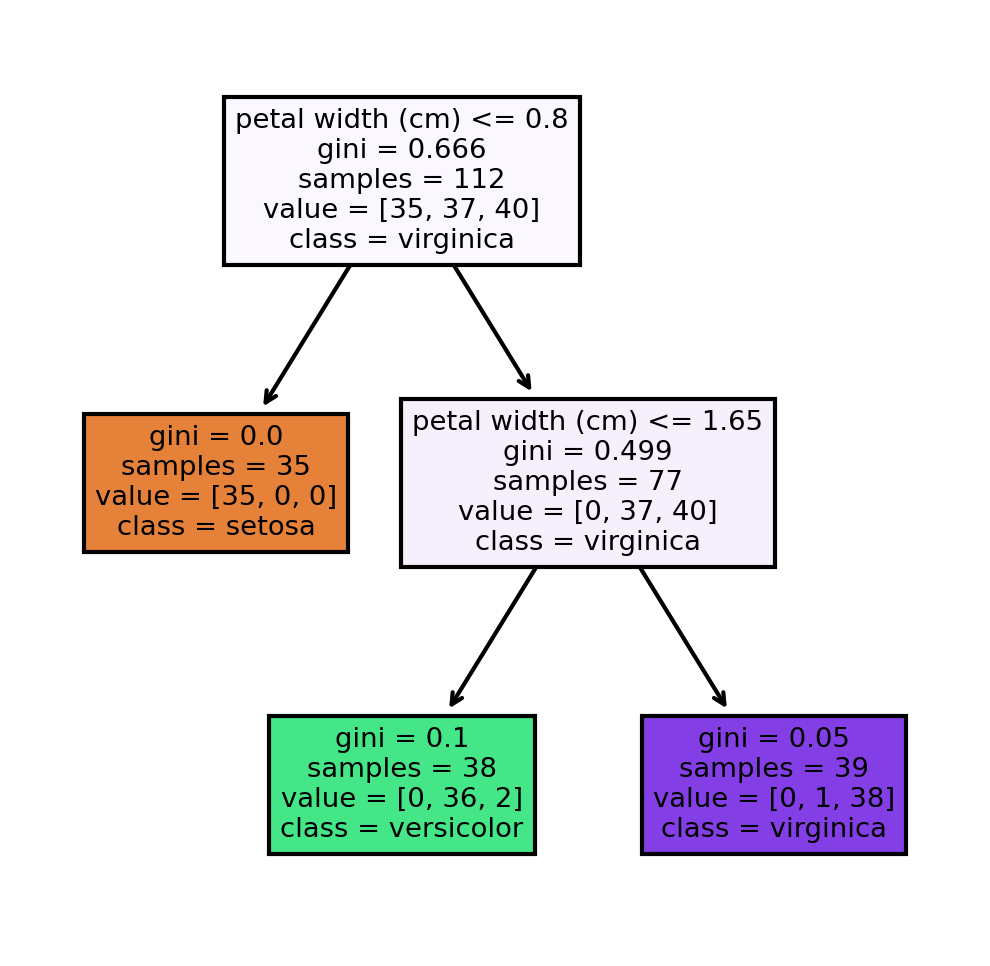

In [53]:
fn=['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']
cn=['setosa', 'versicolor', 'virginica']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(dct,
               feature_names = fn, 
               class_names=cn,
               filled = True);
fig.savefig('calssification.png')